## Этапы вполнения проекта машинного обучения
1. **Постановка задачи** (формирулирование проблемы, определения типа задачи (классификация/кластеризация/регрессия));
2. **Получение данных для ислледования** (загрузка данных для исследования);
3. **Разведывательный анализ** (описание доступных признаков, определение типов рассматриваемых данных, определение признаков содержащих пропущенные значения, оценка распределений значений признаков, оценка корреляций значений признаков с предсказываемой переменной);
4. **Предварительная обработка признаков** (заполнение пропущенных значений признаков, конструирование новых признаков на основе существующих, кодирование и масштабирование признаков);
5. **Обучение моделей и натсройка гиперпараметров** (разделение набора данных на тренировочныхй, тестовый и валидационный, выбор методов оценки моделей, обучение моделей на тренировочных данных, настройка гиперпараметров, выбор модели на тестовых данных);
6. **Оценка модели** (оценка качества модели на валидационных данных, оценка распределения ошибок).

## 1. Постановка задачи

В этой рабочей тетради используется набор данных **Titanic - Machine Learning from Disaster** из *kaggle* соревнования (https://www.kaggle.com/competitions/titanic)

15 апреля 1912 года во время своего первого плавания «Титаник» затонул после столкновения с айсбергом, в результате чего погибли 1502 из 2224 пассажиров и экипажа (32%). Необходимо на основе заранее предоставленного тренировочного набора данных, создать модель которая сможет предсказывать выжил ли пассажир, на основе известной информации.

Таким образом, в рамках данной задачи необходимо создать модель машинного обучения с учителем (обучаемую на тренировочных данных), решающую задачу бинарной классификации и использующую accuracy в качестве метрики качества.


## 2. Получение данных

#### Импорт бибилиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection, preprocessing, ensemble, linear_model, neighbors, svm, naive_bayes

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Загрузка данных

In [3]:
# Загрузим данные
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

df_train.shape, df_test.shape

((891, 12), (418, 11))

## 3. Разведывательный анализ

#### Выведем случайные экземпляры данных

In [4]:
# Выведем случайные экземпляры данных
random_state = 42
df_train.sample(10, random_state=random_state)

PassengerId  Survived  Pclass  \
709          710         1       3   
439          440         0       2   
840          841         0       3   
720          721         1       2   
39            40         1       3   
290          291         1       1   
300          301         1       3   
333          334         0       3   
208          209         1       3   
136          137         1       1   

                                                  Name     Sex   Age  SibSp  \
709  Moubarek, Master. Halim Gonios ("William George")    male   NaN      1   
439             Kvillner, Mr. Johan Henrik Johannesson    male  31.0      0   
840                        Alhomaki, Mr. Ilmari Rudolf    male  20.0      0   
720                  Harper, Miss. Annie Jessie "Nina"  female   6.0      0   
39                         Nicola-Yarred, Miss. Jamila  female  14.0      1   
290                       Barber, Miss. Ellen "Nellie"  female  26.0      0   
300           Kelly, Miss. Anna Katherine "Annie Kate"  female   NaN      0   
333                    Vander Planke, Mr. Leo Edmondus    male  16.0      2   
208                          Carr, Miss. Helen "Ellen"  female  16.0      0   
136                       Newsom, Miss. Helen Monypeny  female  19.0      0   

     Parch            Ticket     Fare Cabin Embarked  
709      1              2661  15.2458   NaN        C  
439      0        C.A. 18723  10.5000   NaN        S  
840      0  SOTON/O2 3101287   7.9250   NaN        S  
720      1            248727  33.0000   NaN        S  
39       0              2651  11.2417   NaN        C  
290      0             19877  78.8500   NaN        S  
300      0              9234   7.7500   NaN        Q  
333      0            345764  18.0000   NaN        S  
208      0            367231   7.7500   NaN        Q  
136      2             11752  26.2833   D47        S

#### Описание признаков в наборе данных

In [5]:
print(df_train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


Выведем список всех признаков
* `PassengerId`  Id пассажира;
* `Survived`  Выжил ли пассажир;
* `Pclass`  Класс билета (1: 1й класс, 2: 2й класс, 3: 3й класс);
* `Name`  Имя пассажира;
* `Sex`  Пол пассажира (male/female);
* `Age`  Возраст пассажира в годах;
* `SibSp`  Количество братьев, сестер, супругов на борту Титаника;
* `Parch`  Число детей, родителей на борту Титаника;
* `Ticket`  Номер билета;
* `Fare`  Пассажирский тариф;
* `Cabin`  Номер кабины;
* `Embarked`  Порт посадки (C: Шербур, S: Саутгемптон, Q: Квинстаун).

#### Найдем признаки содержащие пропущенные значения

In [6]:
print('\nTrain data\n')
df_train.info()
print('\nTest data\n')
df_test.info()


Train data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Test data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null

#### Распределение значений числовых признаков

In [7]:
df_train.describe().T

count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   

                  max  
PassengerId  891.0000  
Survived       1.0000  
Pclass         3.0000  
Age           80.0000  
SibSp          8.0000  
Parch          6.0000  
Fare         512.3292

#### Распределение значений категориальных признаков

In [8]:
df_train.describe(include=['O']).T

count unique                      top freq
Name       891    891  Braund, Mr. Owen Harris    1
Sex        891      2                     male  577
Ticket     891    681                   347082    7
Cabin      204    147                  B96 B98    4
Embarked   889      3                        S  644

### Выполним визуальный анализ корреляции данных с предсказываемой переменной

In [9]:
# Предсказываемая переменная
target_var = 'Survived'

# Числовые переменные
numerical = ['Age', 'SibSp', 'Parch', 'Fare',]
# Категориальные переменные
categorical = ['Sex', 'Embarked', 'Pclass',]

# Кодируем категориальные переменные
df_train[categorical] = df_train[categorical].astype('category')
df_test[categorical] = df_test[categorical].astype('category')

In [10]:
# Настройка параметров визуализации
palette = sns.color_palette('pastel')
edgecolor = '#222222'
figsize = (12, 8)
sns.set_style("whitegrid")

#### Выполним визуализацию категориальных данных

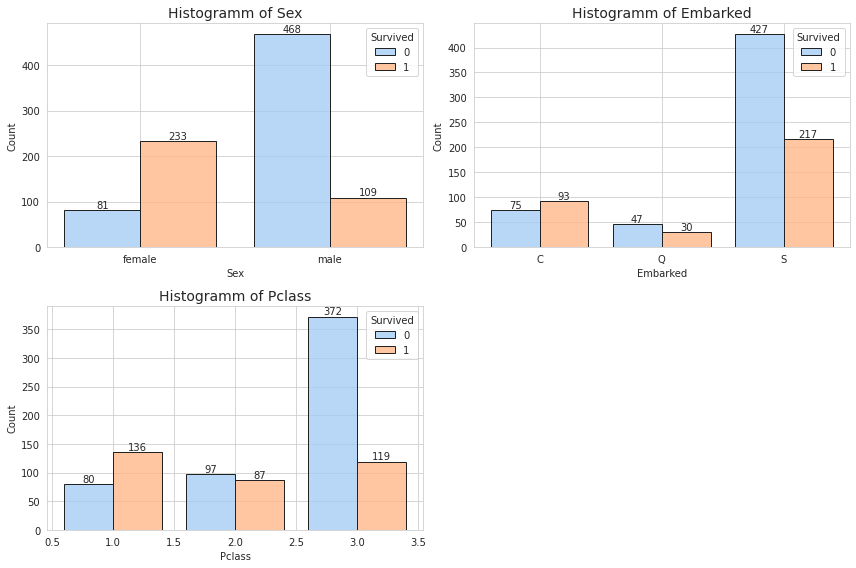

In [11]:
plt.figure(figsize=figsize)
# Число строк и столбцов для вывода данных
n_r, n_c = int(len(categorical) / 2 + 1), 2

for i, col in enumerate(categorical):
    plt.subplot(n_r, n_c, i+1,)
    # Подпись сверху графика
    plt.title(label=f"Histogramm of {col}", fontsize=14)
    # Гистограмма распределения
    ax = sns.histplot(
        data=df_train, x=col, hue=target_var, edgecolor=edgecolor, palette=palette, multiple="dodge", shrink=.8,
    )
    # Добавляем подписи столбцов
    for container in ax.containers:
        ax.bar_label(container, fontsize=10)
        
plt.tight_layout()

#### Выполним визуализацию числовых данных

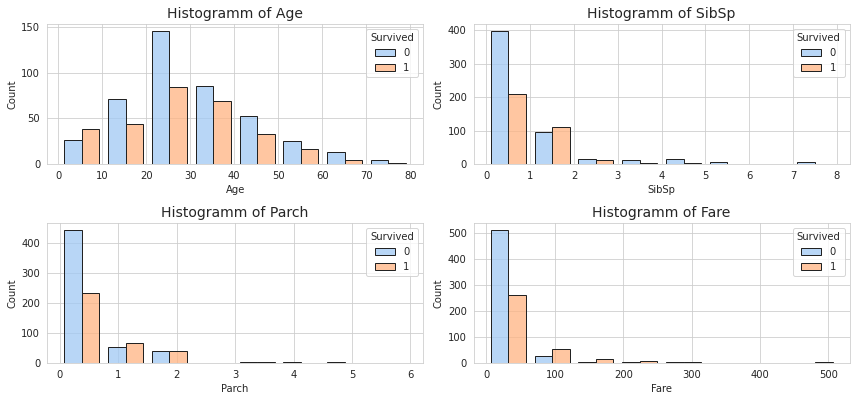

In [12]:
plt.figure(figsize=figsize)
# Число строк и столбцов для вывода данных
n_r, n_c = int(len(numerical) / 2 + 1), 2

for i, col in enumerate(numerical):
    plt.subplot(n_r, n_c, i+1,)
    # Подпись сверху графика
    plt.title(label=f"Histogramm of {col}", fontsize=14)
    # Гистограмма распределения
    ax = sns.histplot(
        data=df_train, x=col, hue=target_var, edgecolor=edgecolor, palette=palette,
        multiple="dodge", shrink=.8, bins=8,
    )
        
plt.tight_layout()

### Предложения на основе анализа распределения данных

#### Заполнение пропусков
* `Fare`, `Embarked` содержат довольно мало пропусков и не требуеют сложной стратегии заполнения;
* `Age` содержит много пропусков, необходимо выработать более точную стратегию их заполнения;
* `Cabin` содержит крайне много пропусков, которые можно заполнить специальным, выделенным значением.

#### Конструирование признаков
* Признаки `Title`, `Cabin` и `Ticket` нельзя использовать напрямую, однако они вполне могут содержать в себе ценную информацию, которую можно попытаться извлечь из них;
* Признаки `SibSp` и `Parch` можно обьеденить в один признак.

#### Масштабирование и кодирование признаков
* Необходимо выполнить *OneHotEncoding* признаков `Embarked` и `Pclass`;
* Необходимо бинаризовать признак `Sex`;
* Числовые признаки можно нормировать, при этом для неоторых из них (с распределением с "тяжелыми" хвостами) выполнить логарифмирование.

## 4. Предварительная обработка признаков

In [13]:
targets = df_train[target_var]
df_train = df_train.drop([target_var], axis=1)

# Создаем обьединенный набор данных
unite = pd.concat([df_train, df_test])
unite = unite.drop(['PassengerId',], axis=1)
unite.shape

(1309, 10)

### Заполнение пропусков

Необходимо заполнить пропуски для значений признаков `Fare`, `Embarked` и `Age`.

Пропуски `Fare` и `Embarked` встречаются крайне редко (менее 1%). Поэтому заполним их медианным и модальным значениями.

In [14]:
# Заполняем пропуски Fare
unite['Fare'] = unite['Fare'].fillna(unite['Fare'].dropna().median())
# Заполняем пропуски Embarked
unite['Embarked'] = unite['Embarked'].fillna(unite['Embarked'].dropna().mode()[0])

Признак `Age` содержит значительно больше пропущенных значений (порядка 20%). Для их заполнения воспользуемся более точным способом, используя некоторые другие коррелирующие признаки. Для этого в данном случае будем использовать переменные `Pclass` и `Sex`. Сгруппируем по ним данные и для начала оценим процент выживания (как среднее значение `Survived`) в разных группах.

In [15]:
pd.crosstab(targets, [df_train['Pclass'], df_train['Sex'],]).T

Survived         0   1
Pclass Sex            
1      female    3  91
       male     77  45
2      female    6  70
       male     91  17
3      female   72  72
       male    300  47

Такая группировка действительно имеет смысл, с точки зрения оценки вероятности выживания. Теперь заполним пропуски в Age, используя медианное групповое значение возраста.

In [16]:
grouped_age = unite.groupby(['Pclass', 'Sex',])[['Age',]]

for (cl, sx), vals in grouped_age:
    # Находим медианное значение в группе
    md = vals.dropna().median()[0]
    
    # Заполняем значения в тренировочном наборе данных
    cond = (unite['Pclass'] == cl) & (unite['Sex'] == sx) & (unite['Age'].isna())
    unite.loc[cond, 'Age'] = md

### Конструирование признаков

Попробуем создать признак на основе признака `Name`. Для этого внимательно рассмотрим представленные там значения.

In [17]:
unite.sample(20, random_state=random_state)['Name']

257                                Niklasson, Mr. Samuel
158                             Borebank, Mr. John James
91                                    Pedersen, Mr. Olaf
808                                    Meyer, Mr. August
304                    McCarthy, Miss. Catherine Katie""
240                                Zabour, Miss. Thamine
227                               McNeill, Miss. Bridget
596                           Leitch, Miss. Jessie Wills
33     Johnston, Mrs. Andrew G (Elizabeth Lily" Watson)"
65                              Moubarek, Master. Gerios
285                                  Dennis, Mr. William
295                                 Angheloff, Mr. Minko
166                                   Brandeis, Mr. Emil
879        Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
105                            Holthen, Mr. Johan Martin
186                 Phillips, Miss. Alice Frances Louisa
273                                   Lennon, Miss. Mary
170                            

Можно заметить что все имена, имеют преписке вроде *Mr*, *Miss*, *Master* и т.п. отделенные точкой в конце. Рассмотрим сколько уникальных значений существует для каждой такой преписки и как они коррелированны с переменной `Survived`. Для этого извелечем из каждой записи первое слово заканчивающее точкой, при помощи регулярных выражений.

In [18]:
pd.crosstab(targets, df_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)).T

Survived    0    1
Name              
Capt        1    0
Col         1    1
Countess    0    1
Don         1    0
Dr          4    3
Jonkheer    1    0
Lady        0    1
Major       1    1
Master     17   23
Miss       55  127
Mlle        0    2
Mme         0    1
Mr        436   81
Mrs        26   99
Ms          0    1
Rev         6    0
Sir         0    1

Эти значения явно коррелированных с вероятностью выживания, однако многие из них встречаются в наборе данных довольно редко. Попробуем обьеденить все записи, занимающие менее 0.5% в общей выборке.

In [19]:
unite['Title'] = unite['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

extra_title = unite['Title'].unique()[unite['Title'].value_counts() / unite.shape[0] < .005]
unite.loc[unite['Title'].isin(extra_title), 'Title'] = 'Extra'

unite = unite.drop(['Name',], axis=1)

Также попытаемся извлеч информацию из признака `Cabin`, рассмотрим те его значения которые не содержат пропусков.

In [20]:
unite.dropna().sample(20, random_state=random_state)['Cabin']

326                 F4
698                C68
366                D37
351               C128
272                C89
52                 D33
215                D36
355                E60
371            E39 E41
429                E10
662                E58
44                 D19
297            C22 C26
64     B57 B59 B63 B66
287                B45
245                C78
230                C83
142    B57 B59 B63 B66
100               C116
583                A10
Name: Cabin, dtype: object

Все гн пропущенные значения содержат в начале букву, судя по всему обозначающую палубу корабля. Рассмотрим как она коррелированна с переменной `Survived`, заполнив пропуски специальным значением.

In [21]:
pd.crosstab(targets, df_train['Cabin'].str.extract('([A-Z])', expand=False).fillna('U')).T

Survived    0    1
Cabin             
A           8    7
B          12   35
C          24   35
D           8   25
E           8   24
F           5    8
G           2    2
T           1    0
U         481  206

Судя по всему некоторые значения довольно сильно коррелированны с вероятностью выживания. Зполним специальным выделенным значением те из них, которые занимают менее 0.5%.

In [22]:
unite['DumpCabin'] = unite['Cabin'].str.extract('([A-Z])', expand=False).fillna('U')

extra_cabin = unite['DumpCabin'].unique()[unite['DumpCabin'].value_counts() / unite.shape[0] < .005]
unite.loc[unite['DumpCabin'].isin(extra_cabin), 'DumpCabin'] = 'U'

unite = unite.drop(['Cabin',], axis=1)

Cоздадим скомбинированный признак `Family`, равный сумму значений признаков `Parch` и `SibSp`.

In [23]:
unite['Family'] = unite['SibSp'] + unite['Parch'] + 1
pd.crosstab(targets, unite['Family'][:891]).T

Survived    0    1
Family            
1         374  163
2          72   89
3          43   59
4           8   21
5          12    3
6          19    3
7           8    4
8           6    0
11          7    0

Можно заметить что новый признак имеет явную положительную корреляцию с `Survived` до 3 членов семье на корабле, после чего характер корреляции меняется а число образцов резко падает. Исходя из этого можно разделить значения `Family` на 3 диапазона. 

In [24]:
family_bins = [0, 1, 4, np.inf]
unite['FamilyGroup'] = pd.cut(unite['Family'], family_bins)

unite = unite.drop(['Family', 'SibSp', 'Parch',], axis=1)

Также рассмотрим признак `Ticket`

In [25]:
unite['Ticket'].value_counts()

Ticket
CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: count, Length: 929, dtype: int64

Можно заметить что некоторые его значения повторяются. Создадим новый признак отвечающий за частоту значения билета в наборе данных.

In [26]:
unite['TicketFreq'] = unite['Ticket'].map(unite['Ticket'].value_counts())

unite = unite.drop(['Ticket',], axis=1)

### Масштабирование и кодирование признаков

Рассмотрим распределение числовых признаков

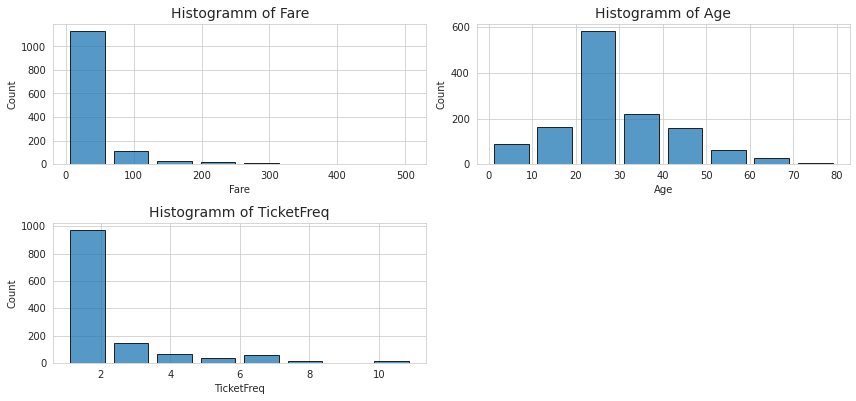

In [27]:
plt.figure(figsize=figsize)
# Число строк и столбцов для вывода данных
n_r, n_c = int(len(numerical) / 2 + 1), 2

for i, col in enumerate(['Fare', 'Age', 'TicketFreq',]):
    plt.subplot(n_r, n_c, i+1,)
    # Подпись сверху графика
    plt.title(label=f"Histogramm of {col}", fontsize=14)
    # Гистограмма распределения
    ax = sns.histplot(
        data=unite, x=col, edgecolor=edgecolor, palette=palette,
        multiple="dodge", shrink=.8, bins=8,
    )
        
plt.tight_layout()

Нормируем их значения, при этом предварительно логарифмировав `TicketFreq` и `Fare`.

In [28]:
def normalize(arr):
    mx = np.max(arr)
    mn = np.min(arr)
    vr = mx - mn
    return (arr - mn) / (mx - mn)

unite['NormLogTicketFreq'] = normalize(np.log(unite['TicketFreq'] + 1))
unite['NormLogFare'] = normalize(np.log(unite['Fare'] + 1))
unite['NormAge'] = normalize(unite['Age'])

unite = unite.drop(['Age', 'Fare', 'TicketFreq',], axis=1)

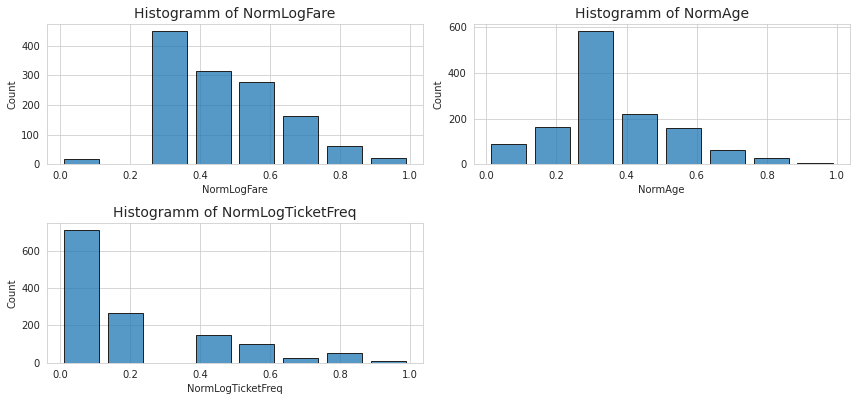

In [29]:
plt.figure(figsize=figsize)
# Число строк и столбцов для вывода данных
n_r, n_c = int(len(numerical) / 2 + 1), 2

for i, col in enumerate(['NormLogFare', 'NormAge', 'NormLogTicketFreq',]):
    plt.subplot(n_r, n_c, i+1,)
    # Подпись сверху графика
    plt.title(label=f"Histogramm of {col}", fontsize=14)
    # Гистограмма распределения
    ax = sns.histplot(
        data=unite, x=col, edgecolor=edgecolor, palette=palette,
        multiple="dodge", shrink=.8, bins=8,
    )
        
plt.tight_layout()

Закодируем бинарный признак `Sex`

In [30]:
unite['Sex'] = unite['Sex'].map({'male': 1, 'female': 0})

Выполним OneHotEncoding для категориальных признаков `Embarked`, `Pclass` а также сконструированных признаков `Title`, `DumpCabin` и `FamilyGroup`.

In [31]:
unite = pd.get_dummies(unite, columns=['DumpCabin', 'FamilyGroup', 'Embarked', 'Pclass', 'Title',], drop_first=False,)

#### Корреляционный анализ

Построим корреляционную матрицу Пирсона для переменных модели, для того чтобы исключить мультиколлинеарность и отбросить незначимые переменные.

In [32]:
corr = unite[:891].copy()
corr['Survived'] = targets
corr.corr(method='pearson').style.background_gradient(cmap='coolwarm')

Корреляционный анализ указывает на сильную корреляцию между переменными `Sex_male` и `Title_Miss`, `Title_Mrs`, `Title_Mr` (что довольно логично). Однако мы не будем удалять данные переменные из модели, т.к. они могут способствовать лучшему пониманию контекста моделью и не являются взаимозаменямыми.

## 5. Обучение моделей

#### Подготовка к обучению моделей

Выполним разделение данных на тренировочные и тестовые. В этом наборе данных, тренировочные данные были отделенны заранее, так что просто отберем первые *891* все записи для обучения.

In [33]:
X_train = unite[:df_train.shape[0]]
X_test = unite[df_train.shape[0]:]
y_train = targets

(X_train.shape, y_train.shape), (X_test.shape)

(((891, 27), (891,)), (418, 27))

Выберем параметры для поиска по решетке. Оценивать каждую модель будем по следующим 3 метрикам:
* ***accuracy*** - доля верно предсказанных ответов среди общего числа примеров. Целевая метрика задачи;
* ***precision*** - доля объектов действительно принадлежащих классу, среди объектов которые модель отнесла к этому классу;
* ***recall*** - доля найденных  объектов класса найденных моделью относительно общего числа объектов класса.

In [34]:
scores = ['accuracy', 'precision', 'recall']
refit = 'accuracy'
# Число фолдов для кроссвалидации
cv = 5

Метод для визуализации k лучших параметров поиска по решетке

In [35]:
def get_best_k_gs_res(gs, k=5, by='mean_test_accuracy', scores=scores):
    res = pd.DataFrame(gs.cv_results_)
    res = res.sort_values(by=by, inplace=False, ascending=False)
    return res.iloc[:k][
        ['param_' + x for x in gs.param_grid.keys()] + ['mean_test_' + x for x in scores]
    ]

### Обучение моделей

Сравним между собой несолько моделей, с оптимальным подбором их гиперпараметров при помощи кроссвалидации по сетке.
* ***Логистическая регерссия*** - Линейная регрессия с сигмоидальной функией активации. Для каждого обьекта предсказывает его вероятность принадлежности к классу и выносит решение о его принадлежности при первышении порогового значения;
* ***Метод k ближайших соседей*** - Для каждого классифицируемого обьекта рассчитвает расстояние до всех других известных обьектов в метрическом пространсве и классифицирует его исходя из информации о классах ближайших соседей;
* ***Метол опорных векторов*** - Строит наиболее оптимальную гиперплоскость в признаковом пространстве обьектов, разделяющую обьекты разных классов;
* ***Градиентный бустинг*** - Строит последовательность моделей, где каждая модель обучается на остатках (разницей между реальным и предсказываемым значением) для предыдущей модели, усредняя их результаты при попомщи суммирования;
* ***Случайный лес*** - Строит набор решающих деревьев (слабых классификаторов), на случайных подмножествах признаков и обьектов, вынося решения о классификации при помощи голосования.

#### Логистическая регрессия

In [36]:
log_reg = linear_model.LogisticRegression(random_state=random_state,)
log_reg_params = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.1, 1.0, 10.0, 100.0,],
    'class_weight': [None, 'balanced'],
}

log_reg_gs = model_selection.GridSearchCV(log_reg, log_reg_params, cv=cv, scoring=scores, refit=refit,)
log_reg_gs = log_reg_gs.fit(X_train, y_train)
get_best_k_gs_res(log_reg_gs)

param_penalty param_C param_class_weight  mean_test_accuracy  \
9             l2     1.0               None            0.827167   
3           None     0.1               None            0.822679   
11          None     1.0               None            0.822679   
19          None    10.0               None            0.822679   
25            l2   100.0               None            0.822679   

    mean_test_precision  mean_test_recall  
9              0.786379          0.759974  
3              0.778092          0.757033  
11             0.778092          0.757033  
19             0.778092          0.757033  
25             0.778092          0.757033

#### k ближайших соседей

In [37]:
knn = neighbors.KNeighborsClassifier()
knn_params = {
    'n_neighbors': [4, 8, 12, 16,],
    'weights': ['uniform', 'distance'],
    'metric': ['cityblock', 'cosine', 'euclidean',],
}

knn_gs = model_selection.GridSearchCV(knn, knn_params, cv=cv, scoring=scores, refit=refit,)
knn_gs = knn_gs.fit(X_train, y_train)
get_best_k_gs_res(knn_gs)

param_n_neighbors param_weights param_metric  mean_test_accuracy  \
7                 16      distance    cityblock            0.802473   
21                12      distance    euclidean            0.801356   
23                16      distance    euclidean            0.801356   
5                 12      distance    cityblock            0.799115   
19                 8      distance    euclidean            0.795757   

    mean_test_precision  mean_test_recall  
7              0.758537          0.710358  
21             0.754944          0.713342  
23             0.757661          0.707460  
5              0.750475          0.713299  
19             0.746117          0.710486

#### Метод опорных векторов

In [38]:
svc = svm.SVC(random_state=random_state,)
svc_params = {
    'C': [0.1, 1.0, 10.0,],
    'class_weight': [None, 'balanced',],
    'kernel': ['rbf', 'linear', 'poly',],
}

svc_gs = model_selection.GridSearchCV(svc, svc_params, cv=cv, scoring=scores, refit=refit,).fit(X_train, y_train)
svc_gs = svc_gs.fit(X_train, y_train)
get_best_k_gs_res(svc_gs)

param_C param_class_weight param_kernel  mean_test_accuracy  \
2     0.1               None         poly            0.829389   
0     0.1               None          rbf            0.828266   
8     1.0               None         poly            0.822692   
6     1.0               None          rbf            0.821555   
7     1.0               None       linear            0.820407   

   mean_test_precision  mean_test_recall  
2             0.800721          0.742327  
0             0.805806          0.730818  
8             0.808353          0.707460  
6             0.806344          0.707374  
7             0.797279          0.716027

#### GradientBoost

In [39]:
gradient_boost = ensemble.GradientBoostingClassifier(random_state=random_state,)
gradient_boost_params = {
    'n_estimators': [5, 10, 20, 50,],
    'max_depth': [2, 3,],
    'subsample': [0.25, 0.5, 0.75, 1.0,],
    'learning_rate': [0.1, 1.0,],
}

gradient_boost_gs = model_selection.GridSearchCV(gradient_boost, gradient_boost_params, cv=cv, scoring=scores, refit=refit)
gradient_boost_gs = gradient_boost_gs.fit(X_train, y_train)
get_best_k_gs_res(gradient_boost_gs)

param_n_estimators param_max_depth param_subsample param_learning_rate  \
25                 20               3             0.5                 0.1   
21                 10               3             0.5                 0.1   
9                  20               2             0.5                 0.1   
26                 20               3            0.75                 0.1   
15                 50               2             1.0                 0.1   

    mean_test_accuracy  mean_test_precision  mean_test_recall  
25            0.838378             0.821643          0.742413  
21            0.830538             0.837937          0.695908  
9             0.830519             0.805220          0.739471  
26            0.829408             0.806399          0.733802  
15            0.828297             0.803535          0.733760

#### RandomForest

In [40]:
random_forest = ensemble.RandomForestClassifier(random_state=random_state,)
random_forest_params = {
    'max_depth' : [4, 6, 8, 10, 12,],
    'n_estimators': [40, 20, 10,],
    'max_features': ['sqrt', 'log2',],
    'min_samples_split': [1, 4, 7, 10,],
    'min_samples_leaf': [1, 4, 7, 10,],
}


random_forest_gs = model_selection.GridSearchCV(random_forest, random_forest_params, cv=cv, scoring=scores, refit=refit)
random_forest_gs = random_forest_gs.fit(X_train, y_train)
get_best_k_gs_res(random_forest_gs)

param_max_depth param_n_estimators param_max_features  \
199               8                 20               sqrt   
304              10                 20               sqrt   
250               8                 20               log2   
307              10                 20               sqrt   
295              10                 20               sqrt   

    param_min_samples_split param_min_samples_leaf  mean_test_accuracy  \
199                       7                      1            0.839520   
304                       4                      4            0.838397   
250                      10                      1            0.838397   
307                       7                      4            0.838397   
295                       7                      1            0.836162   

     mean_test_precision  mean_test_recall  
199             0.832240          0.730818  
304             0.827298          0.733802  
250             0.825605          0.736616  
307             0.827298          0.733802  
295             0.826275          0.725021

## 6. Оценка моделей

Создадим словарь всех моделей

In [41]:
gs = {
    'LogReg':log_reg_gs,
    'KNN': knn_gs,
    'SVC': svc_gs,
    'GradientBoost': gradient_boost_gs,
    'RandomForest': random_forest_gs,
}

In [42]:
evals = pd.DataFrame({
    **{'model': list(gs.keys())}, 
    **{s: [round(gs[k].cv_results_['mean_test_' + s][gs[k].best_index_], 4) for k in gs] for s in scores},
})
evals.sort_values(by=scores[0])[::-1]

model  accuracy  precision  recall
4   RandomForest    0.8395     0.8322  0.7308
3  GradientBoost    0.8384     0.8216  0.7424
2            SVC    0.8294     0.8007  0.7423
0         LogReg    0.8272     0.7864  0.7600
1            KNN    0.8025     0.7585  0.7104

Построим визуализацию

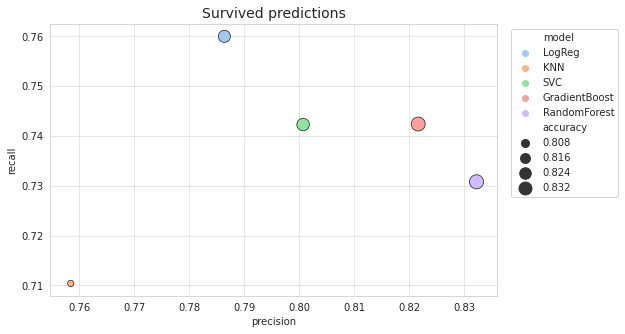

In [43]:
plt.figure(figsize=(8, 5))

plt.title(label=f"{target_var} predictions", fontsize=14)
ax = sns.scatterplot(
    data=evals, x=scores[1], y=scores[2], size=scores[0], sizes=(40, 200), hue='model', 
    edgecolor=edgecolor, palette=palette, legend="brief",
)
plt.legend(bbox_to_anchor=(1.02 , 1))
plt.grid(True, alpha=.6)

Наилучшей моделью являетяс `RandomForest`. Используем ее для генерации предсказаний.

In [44]:
model = gs['RandomForest'].best_estimator_
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Рассмотрим значимость переменных в модели

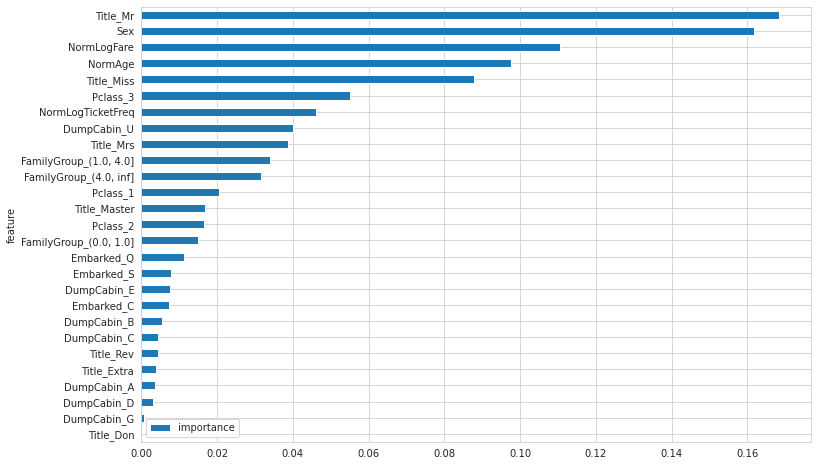

In [45]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = model.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(12, 8),)
plt.show()

Запишем предсказания модели в файл

In [46]:
submission = pd.DataFrame({
    "PassengerId": df_test["PassengerId"],
    "Survived": y_pred,
})
submission.to_csv('./data/submission.csv', index=False)